# Neural Network

### Library yang dibutuhkan

Di sini menggunakan Framework Tensorflow
Library yang akan digunakan adalah **pandas, numpy, matplotlib, seaborn, sklearn, dan tensorflow**. Jika belum diinstall, silahkan diinstal dahulu dengan mengetikkan `pip install nama-library` pada anaconda prompt.

note: Library tensorflow cukup besar sizenya, sekitar 300MB.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### Sedikit penjelasan mengenai Deep Neural Network

**Neural network** adalah sebuah model yang berisikan node atau neuron atau perceptron yang saling terhubung dengan dengan node lain melalui koneksi yang disebut penimbang atau weight. Neural network terbagi menjadi tiga bagian utama:
Input Layer
Hidden Layer
Output Layer

Deep Neural Network (DNN) adalah perluasan dari metode neural network. Perbedaannya adalah dalam DNN mempunyai **lebih dari dua hidden layer**. 
<img src="figure/dnn.png">

### Activation Function

Activation function berfungsi untuk menentukan apakah neuron tersebut harus aktif atau tidak.
Activation yang biasanya digunakan:

    sigmoid = untuk binary classification
    tanh    = untuk binary classification
    softmax = untuk categorical classification
    ReLU
   lainnya bisa dilihat di `https://en.wikipedia.org/wiki/Activation_function`

### Loss Function 

Loss Functioin berfungsi untuk mengukur seberapa besar nilai error yang dihasilkan dari output terhadap nilai aslinya.
Loss function yang biasa digunakan adalah `binary_corssentropy`, `categorical_crossentropy` -> untuk klasifikasi. dan `mse` untuk regresi.

### Backpropagation

Mudahnya backpropagation adalah suatu cara untuk menyesuaikan penimbang dan bias yang dihasilkan untuk meminimalisir error pada output.
<img src="figure/nn.png">
Caranya adalah
1. Menghitung nilai error menggunakan loss function
2. Hitung gradien dari loss funtion tersebut
<img src="figure/loss_opt.png">
<img src="figure/loss_opt2.png">
3. Update parameter bias dan penimbang dari hasil gradien yang didapatkan

nb: belum terlalu paham dengan backpropagation

Optimizer yang biasa digunakan adalah `adam`, `rmsprop`

Penjelasannya juga bisa dilihat di sini `https://medium.com/@samuelsena/pengenalan-deep-learning-part-3-backpropagation-algorithm-720be9a5fbb8` dan bisa juga search sendiri ya

# Contoh 1 Regression

Import Data

In [2]:
df = pd.read_csv('california_housing_sklearn.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Kita akan meregresikan SalePrice (Y) dengan variable independent MedInc, HouseAge, AveRooms, AveBedrms, Population, dan AveOccup.

In [4]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
SalePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


#### Distribution Plot dari Sale Price

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

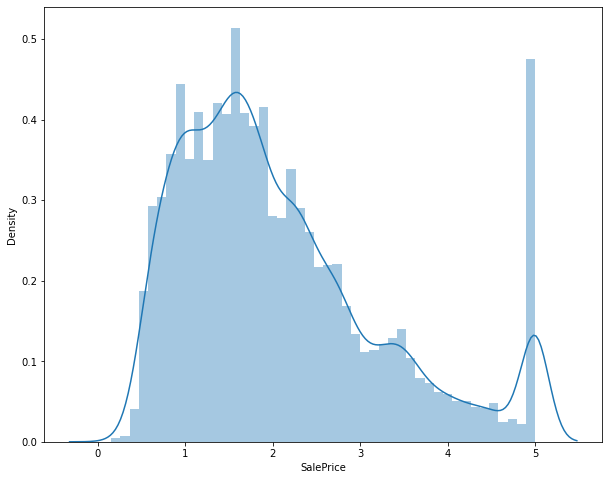

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df['SalePrice'])

#### Korelasi

In [7]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
SalePrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [8]:
df.corr()['SalePrice'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
SalePrice     1.000000
Name: SalePrice, dtype: float64

#### Scatter Plot

<AxesSubplot:xlabel='AveRooms', ylabel='SalePrice'>

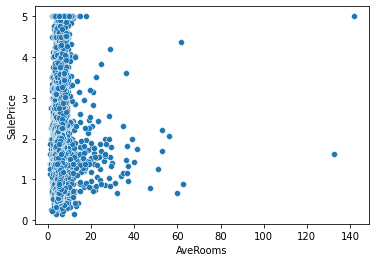

In [9]:
sns.scatterplot(x='AveRooms', y='SalePrice', data=df)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

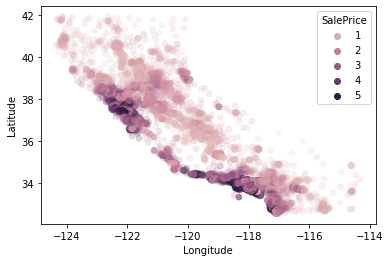

In [10]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, edgecolor=None, alpha=0.2, hue='SalePrice')

### Creating a model

In [11]:
data=df.drop(['Longitude', 'Latitude'], axis=1) #Membuang variabel Longitude dan Latitude #axis=1 untuk kolom, axis=0 untuk baris

In [12]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [13]:
X = data.drop('SalePrice', axis=1).values
y = data['SalePrice']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Split data menjadi data training dan testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=221810445)

#### Normalizing (MinMaxScaler)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train= scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.shape #ada 6 kolom dan 14449 baris

(14448, 6)

### Creating Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(Dense(6,activation='relu')) #input layer
model.add(Dense(6,activation='relu')) #hidden layer
model.add(Dense(1)) #output layer

model.compile(optimizer='adam',loss='mse') 

Banyaknya hidden layer itu tidak ada patokannya, akan tetapi semakin rumit permasalahan, semakin banyak hidden layer. 
`https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw`

### Training Model 

`batch size` adalah jumlah batch datanya (jadi datanya dipecah menjadi beberapa batch), semakin sedikit jumlah batch semakin lama runningnya. Batch berguna untuk data yang berukuran besar. Jumlah batch biasanya 2^n.

`epochs` adalah iterasi untuk update penimbang dan bias. 1 epoch sama dengan menjalankan network dari input sampai ke output. epoch ke 2 (iterasi ke-2) meng-update penimbang dan bias kemudian menjalankan networknya lagi, dst. Standarnya berapa? kira-kira aja wkwkwk nnti diganti2 aja jumlahnya

In [23]:
model.fit(x=X_train,
          y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=150)

#kalau ada error, coba di bagian deklarasi variabel X dan y, belakangnya ditambahin/diilangin values(), yg ini misal e X = data.drop('SalePrice', axis=1).values()

Epoch 1/150
452/452 [==============================] - 1s 2ms/step - loss: 2.5296 - val_loss: 1.2579
Epoch 2/150
452/452 [==============================] - 0s 1ms/step - loss: 1.0529 - val_loss: 0.8099
Epoch 3/150
452/452 [==============================] - 1s 1ms/step - loss: 0.6999 - val_loss: 0.6442
Epoch 4/150
452/452 [==============================] - 0s 1ms/step - loss: 0.6446 - val_loss: 0.6298
Epoch 5/150
452/452 [==============================] - 1s 1ms/step - loss: 0.6380 - val_loss: 0.6333
Epoch 6/150
452/452 [==============================] - 0s 1ms/step - loss: 0.6361 - val_loss: 0.6253
Epoch 7/150
452/452 [==============================] - 1s 1ms/step - loss: 0.6339 - val_loss: 0.6257
Epoch 8/150
452/452 [==============================] - 1s 1ms/step - loss: 0.6325 - val_loss: 0.6233
Epoch 9/150
452/452 [==============================] - 1s 1ms/step - loss: 0.6317 - val_loss: 0.6211
Epoch 10/150
452/452 [==============================] - 0s 1ms/step - loss: 0.6295 - val_lo

452/452 [==============================] - 0s 953us/step - loss: 0.5443 - val_loss: 0.5563
Epoch 82/150
452/452 [==============================] - 0s 1ms/step - loss: 0.5445 - val_loss: 0.5577
Epoch 83/150
452/452 [==============================] - 0s 1ms/step - loss: 0.5427 - val_loss: 0.5546
Epoch 84/150
452/452 [==============================] - 0s 997us/step - loss: 0.5420 - val_loss: 0.5701
Epoch 85/150
452/452 [==============================] - 0s 942us/step - loss: 0.5432 - val_loss: 0.5624
Epoch 86/150
452/452 [==============================] - 0s 900us/step - loss: 0.5417 - val_loss: 0.5553
Epoch 87/150
452/452 [==============================] - 1s 1ms/step - loss: 0.5418 - val_loss: 0.5578
Epoch 88/150
452/452 [==============================] - 0s 869us/step - loss: 0.5415 - val_loss: 0.5533
Epoch 89/150
452/452 [==============================] - 0s 986us/step - loss: 0.5414 - val_loss: 0.5555
Epoch 90/150
452/452 [==============================] - 0s 850us/step - loss: 0.540

hasil di atas bakal beda2 klo di run ulang yak, karna inisialisasi dan updating nilai penimbang dan bias itu random

membandingkan loss dengan validation loss

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,2.529569,1.257901
1,1.052858,0.809851
2,0.699860,0.644197
3,0.644635,0.629762
4,0.637997,0.633275
...,...,...
145,0.506402,0.511656
146,0.503025,0.510455
147,0.502878,0.509100
148,0.502139,0.508422


<AxesSubplot:>

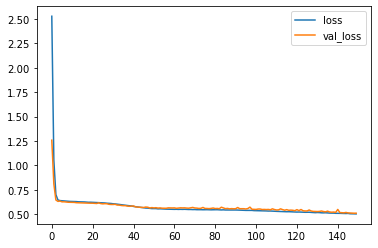

In [26]:
losses.plot()

Jika garis oranye semakin lama semakin ke atas, itu berarti overfitting. Jika garis biru yang ke atas, berarti underfitting
Beberapa cara mengatasinya yaitu mengubuah jumlah epochs, menambah/mengurangi jumlah hidden layer, menambah/mengurangi perceptron/node/neuron.

Lalu ada juga yang namanya fungsi Dropout. Jadi kita membuang sebagian fungsi aktivasi
<img src="figure/drop.png">

Selain itu bisa juga menambahkan fungsi Early Stopping, yang berguna untuk memberhentikan pembelajaran kalau diindikasikan over/underfit.

<img src="figure/early.png">

Misal aja nih, ternyata hasilnya overfit. Nah kita lakuin ini:

In [27]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

mode ada `min`, `max`, dan `auto`.

`min` bakal ngeberhentiin training kalau nilai yang dimonitor berhenti berkurang.

`max` bakal ngeberhentiin training kalau nilai yang dimonitor berhenti berhenti naik. 

`auto` pokoknya bakal ngeberhentiin klo ada kejadian di atas.

`patience` itu misalnya gini, diindikasiin di epoch ke 100 dia overfitting, nah dia bakal berhenti melakukan training ketika epochnya 100+`patience`, di atas patience=25, jadi dia bakal berhenti pas epoch ke 125. bisa juga diisi 0.

In [29]:
model = Sequential()

model.add(Dense(6,activation='relu')) #input layer
model.add(Dropout(0.5))
model.add(Dense(6,activation='relu')) #hidden layer
model.add(Dropout(0.5))
model.add(Dense(1)) #output layer

model.compile(optimizer='adam',loss='mse') 

`Dropout`(0.5) itu mksdnya memberhentikan setengah aktivation function, jadi networknya ga jalan

In [30]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop])

Epoch 1/150
452/452 - 1s - loss: 3.4759 - val_loss: 1.6069
Epoch 2/150
452/452 - 0s - loss: 2.0671 - val_loss: 1.4080
Epoch 3/150
452/452 - 0s - loss: 1.7340 - val_loss: 1.1885
Epoch 4/150
452/452 - 0s - loss: 1.4991 - val_loss: 1.0701
Epoch 5/150
452/452 - 0s - loss: 1.3037 - val_loss: 0.9613
Epoch 6/150
452/452 - 0s - loss: 1.2129 - val_loss: 0.9199
Epoch 7/150
452/452 - 0s - loss: 1.1198 - val_loss: 0.8453
Epoch 8/150
452/452 - 0s - loss: 1.0688 - val_loss: 0.8519
Epoch 9/150
452/452 - 0s - loss: 1.0427 - val_loss: 0.8417
Epoch 10/150
452/452 - 0s - loss: 1.0174 - val_loss: 0.8677
Epoch 11/150
452/452 - 0s - loss: 1.0341 - val_loss: 0.8824
Epoch 12/150
452/452 - 0s - loss: 1.0198 - val_loss: 0.8910
Epoch 13/150
452/452 - 0s - loss: 1.0166 - val_loss: 0.8512
Epoch 14/150
452/452 - 0s - loss: 1.0164 - val_loss: 0.8857
Epoch 15/150
452/452 - 0s - loss: 1.0283 - val_loss: 0.8487
Epoch 16/150
452/452 - 0s - loss: 1.0199 - val_loss: 0.8789
Epoch 17/150
452/452 - 0s - loss: 1.0339 - val_lo

In [31]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

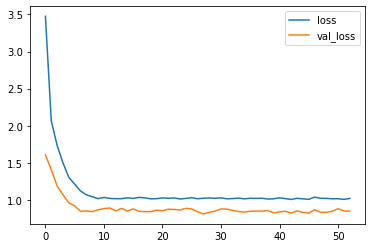

In [32]:
losses.plot()

In [33]:
early_stop = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=25)

In [34]:
model = Sequential()

model.add(Dense(6,activation='relu')) #input layer
model.add(Dense(6,activation='relu')) #hidden layer
model.add(Dense(1)) #output layer

model.compile(optimizer='adam',loss='mse') 

In [35]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=400,
          validation_data=(X_test, y_test), verbose=2,
          callbacks=[early_stop])

Epoch 1/400
452/452 - 1s - loss: 1.6750 - val_loss: 1.0413
Epoch 2/400
452/452 - 0s - loss: 0.9655 - val_loss: 0.8837
Epoch 3/400
452/452 - 0s - loss: 0.7980 - val_loss: 0.7144
Epoch 4/400
452/452 - 0s - loss: 0.6778 - val_loss: 0.6508
Epoch 5/400
452/452 - 0s - loss: 0.6517 - val_loss: 0.6433
Epoch 6/400
452/452 - 0s - loss: 0.6494 - val_loss: 0.6443
Epoch 7/400
452/452 - 0s - loss: 0.6474 - val_loss: 0.6433
Epoch 8/400
452/452 - 0s - loss: 0.6445 - val_loss: 0.6367
Epoch 9/400
452/452 - 0s - loss: 0.6420 - val_loss: 0.6342
Epoch 10/400
452/452 - 0s - loss: 0.6384 - val_loss: 0.6314
Epoch 11/400
452/452 - 0s - loss: 0.6356 - val_loss: 0.6306
Epoch 12/400
452/452 - 0s - loss: 0.6333 - val_loss: 0.6263
Epoch 13/400
452/452 - 0s - loss: 0.6298 - val_loss: 0.6244
Epoch 14/400
452/452 - 0s - loss: 0.6263 - val_loss: 0.6199
Epoch 15/400
452/452 - 0s - loss: 0.6234 - val_loss: 0.6198
Epoch 16/400
452/452 - 0s - loss: 0.6201 - val_loss: 0.6125
Epoch 17/400
452/452 - 0s - loss: 0.6173 - val_lo

In [36]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

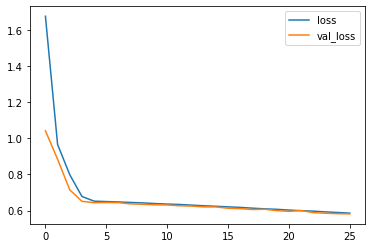

In [37]:
losses.plot()

Ternyata dipakein dropout malah gabagus hasilnya.

### Model Evaluation 

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [39]:
X_test

array([[0.24712763, 0.33333333, 0.07578484, 0.09767782, 0.00238235,
        0.00112374],
       [0.17579068, 0.62745098, 0.02492117, 0.02775877, 0.03615572,
        0.00171913],
       [0.17912167, 0.47058824, 0.02131895, 0.02652413, 0.15569383,
        0.00439971],
       ...,
       [0.11674322, 0.82352941, 0.02469675, 0.0268154 , 0.05092632,
        0.00187474],
       [0.16959766, 0.01960784, 0.02578037, 0.02685689, 0.04492839,
        0.00124809],
       [0.1200811 , 0.90196078, 0.02225972, 0.02197632, 0.02183357,
        0.00229658]])

In [40]:
predictions = model.predict(X_test)

In [41]:
mean_absolute_error(y_test,predictions) #mean absolute error antara y test (nilai asli) dengan y prediction

0.5641443566477006

In [42]:
np.sqrt(mean_squared_error(y_test,predictions)) #root mean square error antara y test (nilai asli) dengan y prediction

0.7623115015482161

In [43]:
explained_variance_score(y_test,predictions) #nilai varians yang bisa dijelaskan oleh model

0.5653730032807149

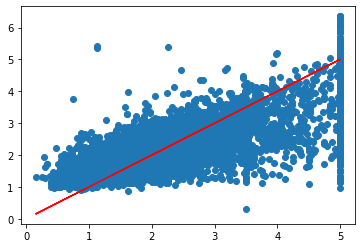

In [44]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [45]:
errors = y_test.values.reshape(6192, 1) - predictions

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

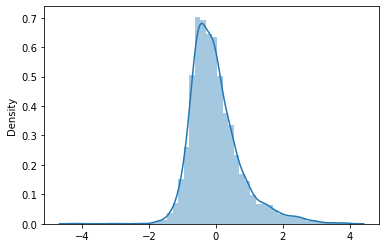

In [54]:
sns.distplot(errors)

### Predicting

In [55]:
single_house = df.drop(['SalePrice','Latitude', 'Longitude'],axis=1).iloc[0]
#iloc[0] untuk mengambil data pada baris pertama

In [56]:
single_house

MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Name: 0, dtype: float64

In [57]:
single_house = single_house.values.reshape(-1, 6) 

Kita reshape menjadi bentuk array

-1 berarti semua variabel ikut

6 mksdnya banyak variabel

In [58]:
single_house

array([[  8.3252    ,  41.        ,   6.98412698,   1.02380952,
        322.        ,   2.55555556]])

In [59]:
single_house = scaler.transform(single_house) #minmaxscaler

In [60]:
model.predict(single_house)

array([[4.587323]], dtype=float32)

In [61]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


Harga aslinya 4.526, harga yg dipredict 4.568731
mayan lah ya